## 정규방정식 

비용함수를 최소화(최소자승법)하는 세타값을 찾기 위한 해석적인 방법

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 선형 데이터 생성 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

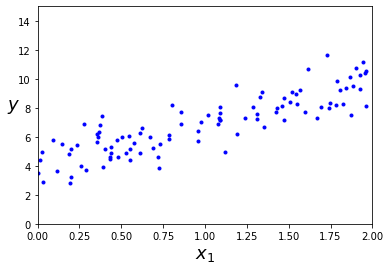

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

In [4]:
# 최소자승법 

X_b = np.c_[np.ones((100,1)),X]  # 모든 샘플에 X0 =1 를 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.04328103],
       [2.87189701]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 X0 =1 를 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04328103],
       [9.78707505]])

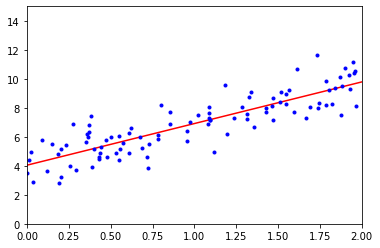

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## 선형회귀 

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [9]:
print(reg.intercept_)
print(reg.coef_)

[4.04328103]
[[2.87189701]]


In [10]:
pred = reg.predict(X_new)
pred

array([[4.04328103],
       [9.78707505]])

In [11]:
# LinearRegression 클래스는 scipy.linalg.lstsq() 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있다
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.04328103],
       [2.87189701]])

    이 함수는  𝐗+𝐲 을 계산합니다.  𝐗+ 는  𝐗 의 유사역행렬 (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). 
    np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있다

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.04328103],
       [2.87189701]])

## 경사하강법(gradient descent, GD) 

* 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘, 비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 방법이다.
* 파라미터 벡터에 대해 비용함수의 현재 기울기를 계산한다. 기울기가 감소하는 방향으로 진행되며 기울기가 0이 되면 최솟값에 도달한 것이다.
* learning rate(학습률), 경사하강법에서 중요한 파라미터로 다음 지점으로 얼마나 갈 것인가 결정 
* 학습률이 큰경우 데이터가 무질서하게 이탈하며 최저점에 수렴하지 못함, 작은 경우 학습시간이 매우 오래 걸리며, 최저점에 도달하지 못함
* 경사하강법을 사용할 때 모든 특성이 같은 스케일을 갖도록 해야한다. 

## 배치 경사 하강법 
경사 하강법을 구현하려면 각 모델 파라미터 세타j에 대해 비용함수의 기울기를 계산해야 한다. 세타j가 조금 변경될때 비용함수가 얼마나 바뀌는지 계산해야한다. 을 **편도함수(partial derivative)** 라고한다.  




**비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$



> 공식은 매 경사 하강법 스템에서 전체 훈련세트 X에 대해 계산한다. 그래서 이 알고리즘을 **배치 경사 하강법**이라고 한다. 즉 매 스템에서 훈련데이터 전체를 사용한다. 이런 이유로 매우 큰 훈련세트에서는 아주 느리다. 그러나 경사하강법은 특성 수에 민감하지 않다. 수십만 개의 특성에서 선형회귀를 훈련시키려면 정규방정식이나 SVD분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

In [13]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.04328103],
       [2.87189701]])

In [15]:
X_new_b.dot(theta)

array([[4.04328103],
       [9.78707505]])

In [16]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

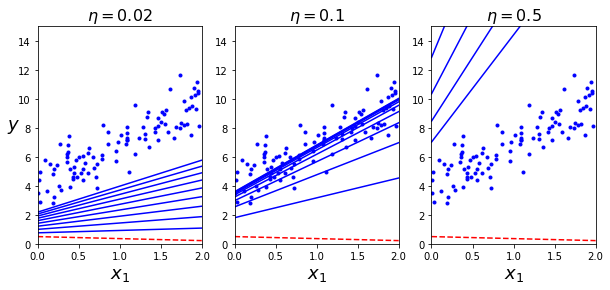

In [17]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

    왼쪽의 학습률이 너무 낮다. 알고리즘은 최적점에 도달하지겠지만 시간이 오래 걸릴것이다.   
    가운데는 학습률이 적당하다. 반복 몇번 만에 이미 최적점에 수렴한다.   
    오른쪽으로 학습률이 너무 높다. 알고리즘이 산발적으로 스템마다 최적점에서 점점 더 멀어져 발산한다.  
    
    적절한 학습률을 찾기 위해서는 그리드 탐색을 사용한다. 하지만 그리스 탐색에서 수렴하는데 너무 오래 걸리는 모델을 막기 휘해 반복횟수를 제한한다.
    반복횟수는 어떻게 지정할까? 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈춘다. 너무크면 모델파라미터가 더는 변하지 않는 동안 시간을 낭비한다
    해결책은 반복횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면 , 즉 벡터의 노름이 어떤 값(허용오차) 보다 작아지면 경사 하강법이 최솟값에 도달한 것으로 알고리즘을 중단한다.

## 확률적 경사 하강법 

배치 경사 하강법의 가장 큰 문제는 매 스템에서 전체 훈련 세트를 사용해 그레디언트를 계산한다는 사실이다 훈련 세트가 커지면 매우 느려지게 된다
이와는 정반대로 확률적 경사 하강법은 매 스템에서 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다.
매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한번에 하나의 샘플을 처리하면 알고리즘이 확실히 속도가 빠르다. 
또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트로 훈련 시킬 수 있다.
     
 

 확률적 경사 하강법은 무작위성을 갖고 있으므로(확률적) 배치 경사 하강법보다 훨씬 불안정하다. 비용함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치며 평균적으로 감소 한다. 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할것이다. 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아니다.

무작위성은 지역 최솟값에서 탈출시켜서 좋지만 알고리즘이 전역 최솟값에 다다르지 못하게 한다는 점에는 좋지 않다. 딜레마를 해결하는 한가지 방법은 학습률을 점진적으로 감소시키는것이다.  매 반복에서 학습률을 결정하는 함수를 학습 스케줄이라고 부른다. 

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

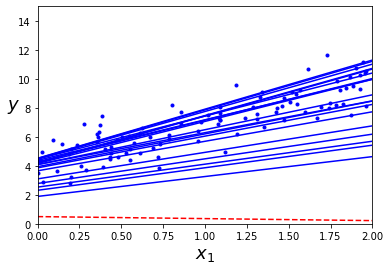

In [19]:
# 학습스케줄을 사용한 확률적 경사 하강법 

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
                              
plt.show()                     

In [20]:
theta

array([[4.03256226],
       [2.88015293]])

In [21]:
from sklearn.linear_model import SGDRegressor

#max_iter 1000번 epoch
# tol 0.001 보다 적게 손실이 줄어들때까지 실행 
# eta 학습률 0.1
sgd_reg = SGDRegressor(max_iter = 1000 , tol = 1e-3 , penalty = None , eta0 = 0.1)
sgd_reg.fit(X ,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([4.07815228]), array([2.96489216]))

## 미니 배치 경사 하강법

미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산한다. 확률적 경사 하강법에 비해 미니배치 경사 하강법의. 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.  

미니배치를 어느정도 크게하면 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다.

In [23]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [24]:
theta

array([[4.05510495],
       [2.86009449]])

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

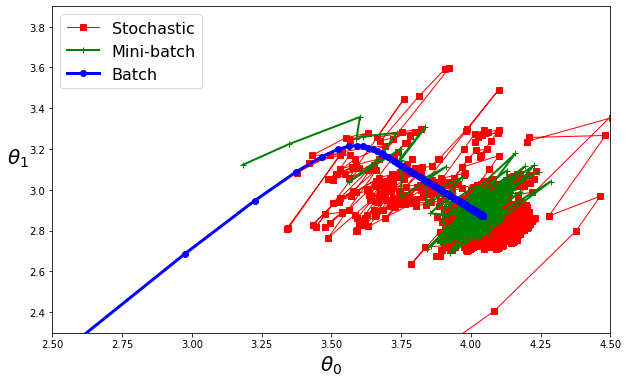

In [26]:
plt.figure(figsize=(10,6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

#### 세가지 경사하강법 알고리즘이 훈련과정 동안 파라미터 공간에서 움직인 경로  
모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적, 미니배치 경사 하강법은 근처에서 맴돌고 있다. 그렇지만 배치경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적, 배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달한다는 것을 인지

## 다항회귀
비선형 데이터를 학습하는데 선형모델 사용  
**각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다.**

In [27]:
# 2차 방정식으로 비선형 데이터 생성 

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m ,1) -3
y = 0.5  * X**2 + X+2 + np.random.randn(m, 1)

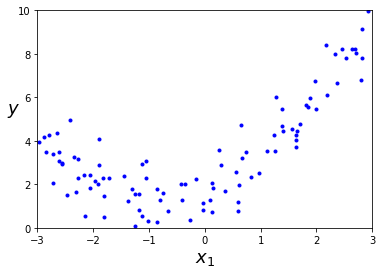

In [28]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

In [29]:
# PolynomialFeature 사용해 훈련데이터 변환 , 훈련세트에 각 특성을 제곱하여 새로운 특성으로 추가

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree =2 , include_bias= False)
X_poly = poly_features.fit_transform(X)

In [30]:
X[0]

array([-0.75275929])

In [31]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

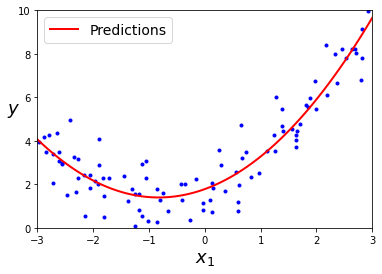

In [33]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

## 학습곡선

훈련세트와 검증세트의 모델 성능을 훈련 세트크기의 함수로 나타낸다. 

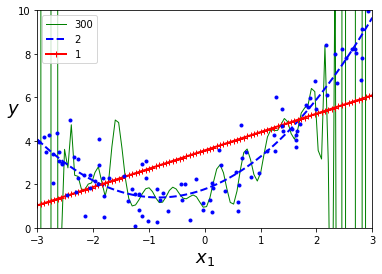

In [34]:
# 선형회귀는 과소적합, 다항회귀는 과대적합 

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

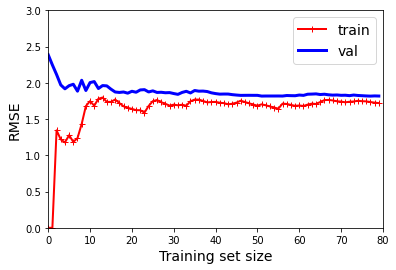

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        

plt.show()                  

훈련데이터의 성능 ,0에서 시작하므로 훈련세트에 하나 혹은 두개의 샘플이 있을땐 모델이 완벽하게 작동한다. 하지만 훈련세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련데이터를 완벽히 학습하는 것이 불가능 해진다. 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승한다.  

검증데이터에 대한 모델성능, 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 크다. 모델에 훈련샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다. 하지만 선형회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해저서 훈련 세트의 그래프와 가까워 진다. 

**이 학습곡선은 과소적합의 전형적인 모습이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있기 때문**

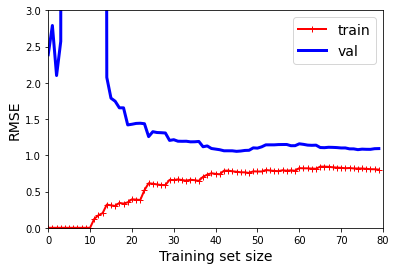

In [37]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           

plt.show()      

    위 학습곡선은 훈련데이터에 오차가 선형회귀모델보다 훨씬 낮다.두 곡선 사이에 공간이 존재, 즉 훈련 데이터에서의 모델 성능이 검증 데이터에서부터 훨씬 낮다는 뜻이다. 이는 과대적합 모델의 특징이다. 그러나 더 큰 훈련세트를 사용하면 두 곡선이 점점 가까워 진다.

### 편향/분산 트레이드 오프 
모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다.

* 편향: 일반화 오차중에서 편향은 잘못된 가정으로 인한 것이다. 데이터가 실제로는 2차인데 선형으로 가정하는 경우, 편향이 큰 모델은 훈련데이터에 과소적합되기 쉽다.

* 분산: 훈련데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타난다. 자유도가 높은 모델(예를 들면 고차다항회귀모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있다.

* 줄일 수 없는 오차: 데이터 자체에 있는 잡음 때문에 발생한다. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것이다.

모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어든다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다.

## 규제가 있는 선형 모델 

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다. 자유도를 줄이면 데이터에 과대적합되기 어려워진다.   
다항회귀모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.  
선형회귀모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다. 

## 릿지회귀

규제가 추가된 선형회귀 버전이다. 규제항이 비용함수에 추가된다. 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력한다. 규제항은 훈련하는 동안에만 비용함수에 추가된다. 모델은훈련이 끝나면 모델의 성능을 규제가 없는 성능지표로 평가한다.

**릿지 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$

하이퍼파라미터 a는 모델을 얼마나 많이 규제할지 조절, a가 0이면 릿지회귀는 선형회귀와 같아진다. a가 아주 크면 모든 가중치가 거의 0에 가까줘지고 결국 데이터의 평균을 지나는 수평선이 된다.  

**릿지회귀는 입력특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다.**

In [38]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [40]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

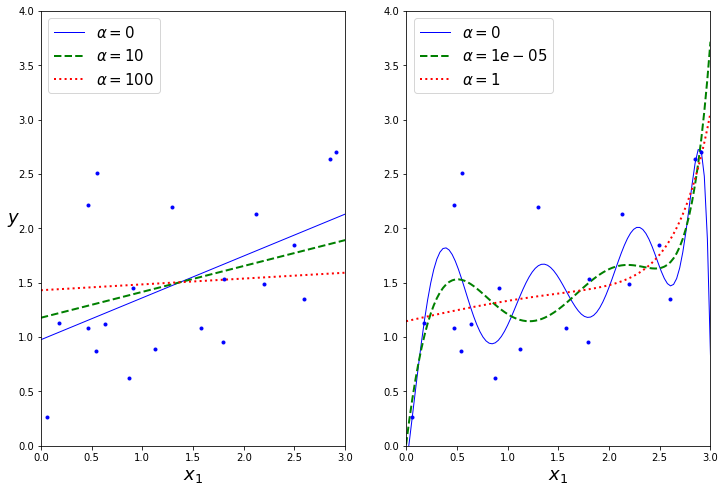

In [41]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(12,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()

 선형데이터에 몇가지 다른 a를 사용해 릿지 모델을 훈련시킨 결과이다. 왼쪽그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만든것  
 오른쪽 그래프는 PolynomialFeature(degree = 10)을 사용해 먼저 데이터를 확장하고 StadardScaler를 사용해 스케일을 조정한 후 릿지 모델을 적용한 것이다. 결국 이는 릿지 규제를 사용한 다항회귀가 된다. 
 
 
 **a를 증가시킬수록 직선에 가까워지는 것을 볼 수 있다. 즉 모델은 분산은 줄지만 편향은 커지게 된다.**

## 라쏘회귀
선형회귀의 또 다른 규제 버전이다. 릿지회귀처럼 비용함수에 규제항을 더하지만 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 노름을 사용한다.

**라쏘회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점이다.(즉 가중치가 0이 된다.)**   
라쏘 회귀는 자동으로 특정선택을 하고 희소모델을 만든다.(0이 아닌 특성의 가중치가 적다.

**라쏘 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$

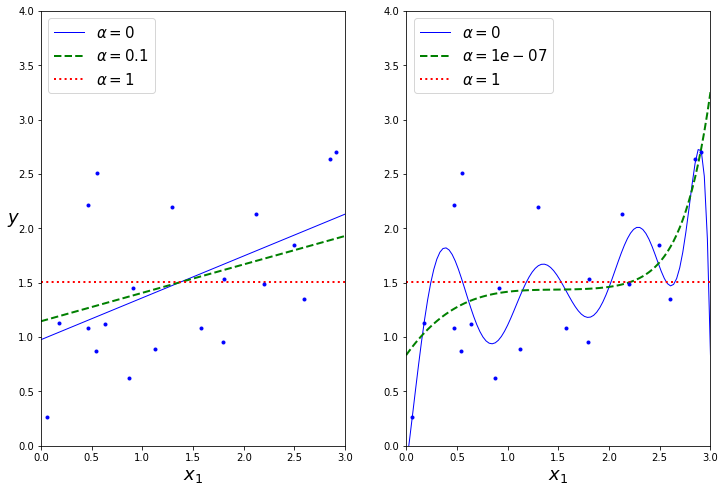

In [42]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(12,8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)


plt.show()

In [43]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 엘라스틱넷
릿지회귀와 라쏘회귀를 절충한 모델이다. 규제항은 릿지와 회귀의 규제하을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다.   
r = 0이면 엘라스틱넷은 릿지회귀와 같고, r = 1이면 라쏘회귀와 같다.

**엘라스틱넷 비용 함수**
​
$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$


### 보통의 선형회귀(규제가 없는 모델), 릿지, 라쏘, 엘라스틱넷을 언제 사용해야 할까?
적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형회귀는 피해야한다.  
릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 좋다. 이 모델들은 불필요한 특성의 가중치를 0으로 만들어 줄것이다.  
특성 수가 훈련샘플 수보다 많거나 특성 몇개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 엘라스틱을 선호한다.

## 조기종료
검증에러가 최솟값에 도달하면 바로 훈련을 중지 시키는 방법

In [44]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [45]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start = True지정 시 fit method가 호출될때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어간다.
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

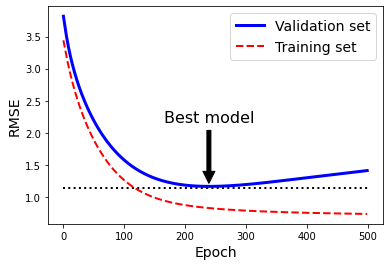

In [46]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [47]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

배치 경사 하강법으로 훈련시킨 고차원 다항 회귀 모델  
에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련세트에 대한 예측에러와 검증세트에 대한 예측에러가 줄어든다. 그러나 감소하던 검증에러가 멈추었다가 다시 상승한다. 모델이 훈련데이터에 과대적합되기 시작한다는 것을 의미 
조기종료는 검증에러가 최소에 도달하는 즉시 훈련을 멈춘다.

## 로지스틱 회귀 
샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용된다. 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측한다.

#### 로지스틱 회귀 작동원리
선형회귀모델과 같이 회귀모델은 입력 특성의 가중치 합을 계산한다(그리고 편향을 더한다.) 대신 선형회귀처럼 바로 결과를 출력하지 않고 결과값의 로지스틱을 출력  


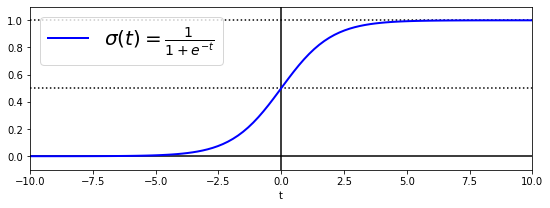

In [48]:
# 로지스틱 함수 
# 0~1사이의 값을 출력하는 시그모이드 함수 

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

### 훈련과 비용함수
로지스틱회귀 모델의 훈련의 목적은 양성샘플 (y = 1)에 대해서는 높은 확률을 추정하고 음성샘플 (y = 0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 백터 세타를 찾는 것이다. 

**하나의 훈련 샘플에 대한 비용 함수**

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$


**로지스틱 회귀 비용 함수(로그 손실)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$


**로지스틱 비용 함수의 편도 함수**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

## 결정경계

In [49]:
# iris data 사용

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [50]:
X = iris['data'][:, 3:] # 꽃잎의 너비 
y = (iris['target'] ==2).astype(np.int) # Iris virginica이면 1 아니면 0

In [51]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

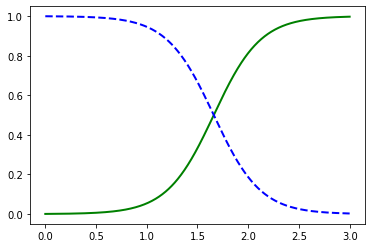

In [52]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산 

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.show()

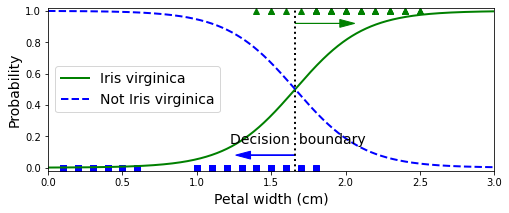

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

verginica의 꽃잎너비는 1.4 ~ 2.5cm에 분포(삼각형), 다른 꽃들은 일반적으로 꽃잎 너비가 더 작아 0.1 ~ 1.8cm에 분포한다. 그렇기 때문에 중첩되는 부분이 존재. 꽃잎 너비가 2cm이상이 꽃은 분류기가 verginica라고 강하게 확신한다. 반면 1cm이하면 verginica가 아니라고 확신, 이 두 극단 사이에서는 분류가 확실하지 않다. 하지만 클래스를 예측하려고 가장 가능성 높은 클래스를 반환한다. 그렇기 때문에 양쪽의 확률이 50%가 되는 1.6cm근방에서 **결정경계가 만들어 진다. 꽃잎너비가 1.6cm보다 크면 verginica 그보다 작으면 아니라고 예측할 것이다.**

In [54]:
decision_boundary

array([1.66066066])

In [55]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

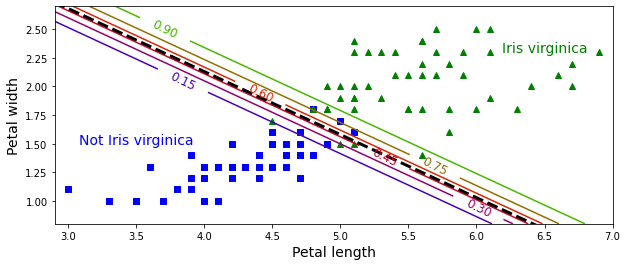

In [56]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

## 소프트맥스 회귀
로지스틱회귀모델은 여러 개의 이진분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화 할 수 있다. 이를 소프트맥스 회귀 또는 다항 로지스틱회귀라고 한다.

샘플 X가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산하고 그 점수에 소프트맥스 함수(정규화된 지수함수)를 적용하여 각 클래스의 확률을 추정한다.


**소프트맥스 함수**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

* k는 클래스 수  
* s(X)는 샘플 X에 대한 각 클래스의 점수를 담은 백터   
* $ \sigma\$(s(X))는 샘플 X에 대한 각 클래스의 점수가 주어졌을때 이 샘플이 클래스 k에 속할 추정 확률이다.

소프트맥스 회귀 분류기는 한번에 하나의 클래스만 예측한다. 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서만 사용해야한다. 하나의 사진에서 여러 사람의 얼굴을 인식하는데는 사용할 수 없다.

**크로스 엔트로피 비용 함수**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

모델이 타깃 클래스에 대해서는 높은 확률을 그리고 다른 클래스에 대해서는 낮은 확률을 추정하도록 만드는 것이 목적이다. 크로스 엔트로피 비용함수를 최소화 하는 것이 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합한다.   

**크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용된다.**

In [57]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

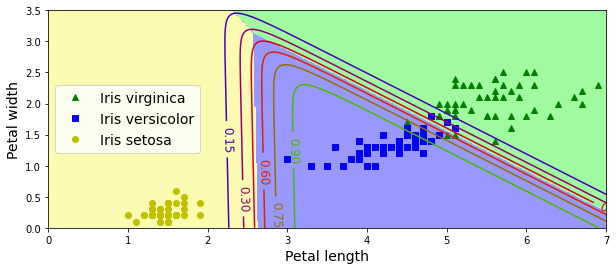

In [58]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [59]:
softmax_reg.predict([[5, 2]])

array([2])

In [60]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])